In [1]:
%cd ..

/home/feodor/Jupyter/depth-poset


/home/feodor/Jupyter/jupyter-env/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from src.depth import DepthPoset
from src.proximity import Proximity

In [3]:
prox1 = Proximity.from_rectangles([0.2, 0.5, 0.8], [0.3, 0.6, 1.0], [0.4, 0.7, 0.8], [0.5, 0.8, 1.0])
prox2 = Proximity.from_rectangles([0.1], [0.9], [0.2], [0.9])


prox = abs(prox1 - prox2)

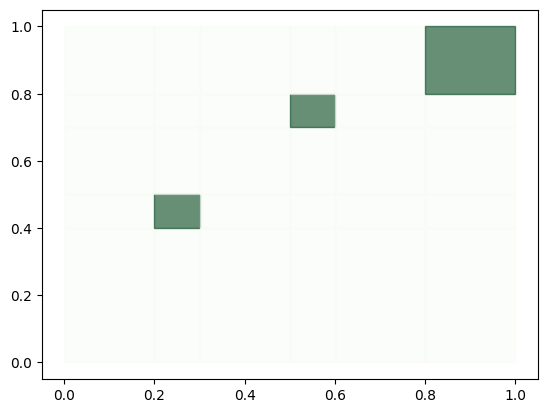

In [4]:
prox1.show(cmap='Greens', alpha=0.6)

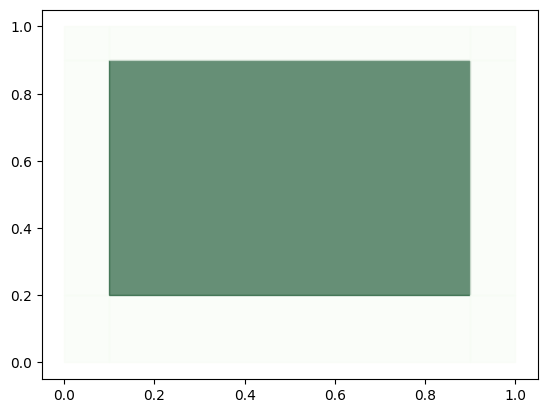

In [5]:
prox2.show(cmap='Greens', alpha=0.6)

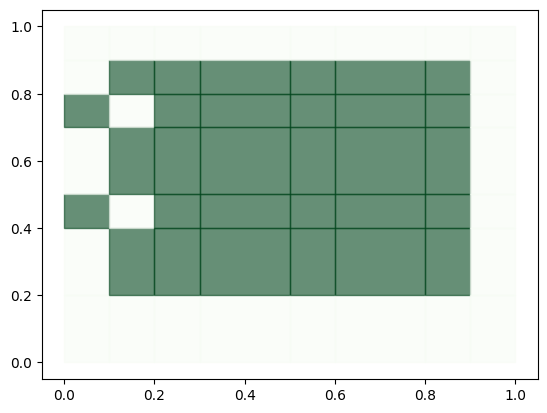

In [6]:
prox.show(cmap='Greens', alpha=0.6)

Что-то не так. Она должна съесть кусок с правого верхнего угла и сделать дополнительный уголок.

In [7]:
import numpy as np

np.array(np.meshgrid(np.arange(3), np.arange(5))).transpose([1, 2, 0]).shape

(5, 3, 2)

In [8]:
prox([0.5, 0.6, 0.5], [0.5, 0.4, 0.9])

array([1., 1., 0.])

In [15]:
prox1.values

array([[0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [16]:
prox2.values

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [17]:
prox1.integrate(), prox2.integrate(), prox.integrate()

(np.float64(0.059999999999999984), np.float64(0.5599999999999999), inf)

In [14]:
prox.values # Так тоже быть не должно. Проблема, видимо, в строчках 50-55 метода from_rectangles

array([[0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0.]])

In [19]:
# proximity distance prototype

def proximity_distance(dp0: DepthPoset, dp1: DepthPoset, p=1) -> float:
    prox0 = Proximity.from_depth_poset(dp0)
    prox1 = Proximity.from_depth_poset(dp1)

    return (abs(prox0 - prox1)**p).integrate()**(1/p)